# Real vs Fake News Detection
## Objective:


*  To test models with different dataset
*  To test a new model - LSTM model



In [ ]:
# Importing all the necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")

In [ ]:
# Load the data set
fake = pd.read_csv("/content/politifact_fake.csv")
true = pd.read_csv("/content/politifact_real.csv")

In [ ]:
fake.head()

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [ ]:
true.head()

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [ ]:
true.shape, fake.shape

((624, 4), (432, 4))

In [ ]:
true.info(), fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         624 non-null    object
 1   news_url   567 non-null    object
 2   title      624 non-null    object
 3   tweet_ids  409 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         432 non-null    object
 1   news_url   428 non-null    object
 2   title      432 non-null    object
 3   tweet_ids  392 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


(None, None)

In [ ]:
(fake[fake[1:23481]==0]).sum()

,0
id,0
news_url,0
title,0
tweet_ids,0


In [ ]:
fake.isna().sum()

,0
id,0
news_url,4
title,0
tweet_ids,40


In [ ]:
true.isna().sum()

,0
id,0
news_url,57
title,0
tweet_ids,215


In [ ]:
# Adding the target column to both of these datasets
fake['label'] = 0
true['label'] = 1

In [ ]:
# Merging the two dataset into one and shuffling them
from sklearn.utils import shuffle
df = pd.concat([fake, true], ignore_index=True)
df = shuffle(df, random_state=42).reset_index(drop=True)
df

,id,news_url,title,tweet_ids,label
0,politifact14885,www.breakingnews247.net/59bc13819a723/world-s-...,World's most popular candy to be removed from ...,908193166632812545\t908318679821160450\t908327...,0
1,politifact1106,http://frwebgate.access.gpo.gov/cgi-bin/getdoc...,Browse Congressional Bills,2761266599\t3283658037\t3439787429\t5180526172...,1
2,politifact1678,http://abcnews.go.com/ThisWeek/video/supreme-c...,Supreme Court Vacancy Video,NaN,1
3,politifact370,http://tonto.eia.doe.gov/dnav/pet/pet_move_wkl...,U.S. Imports & Exports,735229171086065664\t735591660080488449\t736678...,1
4,politifact15263,http://sciencevibe.com/2018/04/11/dying-78-yea...,Dying 78 Year Old CIA Agent Admits To Killing ...,588772842071666688\t588795790774140929\t588796...,0
...,...,...,...,...,...
1051,politifact14090,http://breaking13news.com/malia-obama-arrested...,Malia Obama Arrested With A Gang Of Thugs In C...,860598566041120770\t860609994693193728\t860621...,0
1052,politifact6641,http://www.bls.gov/ces/,"Employment, Hours, and Earnings from the Curre...",8205638712\t8205989275\t8252629709\t8253613759...,1
1053,politifact14904,https://web.archive.org/web/20180109225217/htt...,HOLLYWOOD CELEBS: WE WILL GO ON ‘TOTAL STRIKE’...,826330960354492417\t917224267921666048\t917231...,0
1054,politifact4555,http://www.cq.com/doc/newsmakertranscripts-395...,testimony submitted to the Congressional Overs...,NaN,1


In [ ]:
# Dropping irrelavent columns from the dataframe
data=df.drop(['id','news_url','tweet_ids'], axis = 1)

In [ ]:
data

,title,label
0,World's most popular candy to be removed from ...,0
1,Browse Congressional Bills,1
2,Supreme Court Vacancy Video,1
3,U.S. Imports & Exports,1
4,Dying 78 Year Old CIA Agent Admits To Killing ...,0
...,...,...
1051,Malia Obama Arrested With A Gang Of Thugs In C...,0
1052,"Employment, Hours, and Earnings from the Curre...",1
1053,HOLLYWOOD CELEBS: WE WILL GO ON ‘TOTAL STRIKE’...,0
1054,testimony submitted to the Congressional Overs...,1


In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(text):
    # 1. Convert to lowercase
    text = str(text).lower()

    # 2. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 6. Remove extra whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)

    # 7. Tokenize and remove stopwords + lemmatize words
    tokens = text.split()
    tokens = [lemma.lemmatize(word,pos ='v') for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [ ]:
# Apply the clean text to the datframe
data['clean_text'] = data['title'].apply(clean_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_text']).toarray()
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Import the neccessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Define the models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": LinearSVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

In [ ]:
# Define classification evaluation function
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted', zero_division=0)
    recall = recall_score(true, predicted, average='weighted', zero_division=0)
    f1 = f1_score(true, predicted, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Store the results
model_list = []
accuracy_list = []

# Loop over models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    # Evaluate training performance
    train_acc, train_prec, train_rec, train_f1 = evaluate_classification_model(y_train, y_train_pred)
    # Evaluate testing performance
    test_acc, test_prec, test_rec, test_f1 = evaluate_classification_model(y_test, y_test_pred)

    # Append the results
    model_list.append(name)
    accuracy_list.append(test_acc)

    # Print the results
    print(name)
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_acc))
    print("- Precision: {:.4f}".format(train_prec))
    print("- Recall: {:.4f}".format(train_rec))
    print("- F1 Score: {:.4f}".format(train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_acc))
    print("- Precision: {:.4f}".format(test_prec))
    print("- Recall: {:.4f}".format(test_rec))
    print("- F1 Score: {:.4f}".format(test_f1))

    print("=" * 35)
    print("\n")

Naive Bayes
Model performance for Training set
- Accuracy: 0.9842
- Precision: 0.9846
- Recall: 0.9842
- F1 Score: 0.9842
----------------------------------
Model performance for Test set
- Accuracy: 0.7896
- Precision: 0.8044
- Recall: 0.7896
- F1 Score: 0.7789


Logistic Regression
Model performance for Training set
- Accuracy: 0.9747
- Precision: 0.9753
- Recall: 0.9747
- F1 Score: 0.9746
----------------------------------
Model performance for Test set
- Accuracy: 0.7494
- Precision: 0.7837
- Recall: 0.7494
- F1 Score: 0.7260


Random Forest
Model performance for Training set
- Accuracy: 0.9984
- Precision: 0.9984
- Recall: 0.9984
- F1 Score: 0.9984
----------------------------------
Model performance for Test set
- Accuracy: 0.7636
- Precision: 0.7851
- Recall: 0.7636
- F1 Score: 0.7471


Linear SVM
Model performance for Training set
- Accuracy: 0.9984
- Precision: 0.9984
- Recall: 0.9984
- F1 Score: 0.9984
----------------------------------
Model performance for Test set
- Accura

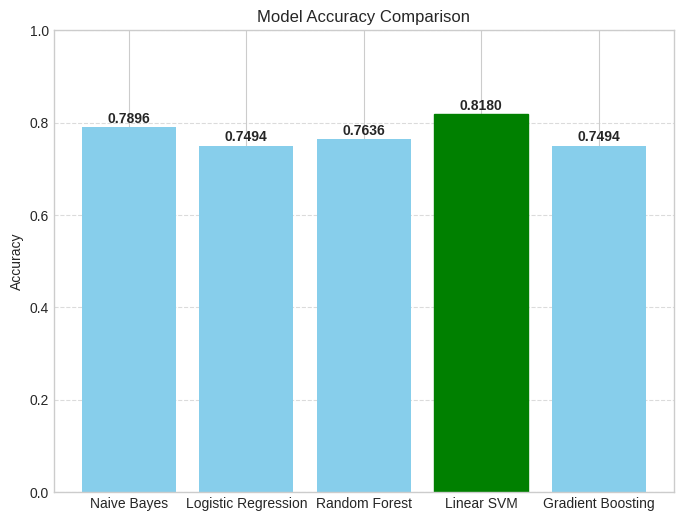

In [ ]:
# Plotting the models accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = plt.bar(model_list, accuracy_list, color='skyblue')

# Highlight the best model
best_index = accuracy_list.index(max(accuracy_list))
bars[best_index].set_color('green')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, acc in enumerate(accuracy_list):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontweight='bold')

plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Parameters
max_words = 10000
max_len = 200

# Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['clean_text'])  # X = your cleaned news text

X_seq = tokenizer.texts_to_sequences(data['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 700ms/step - accuracy: 0.5451 - loss: 0.6728 - val_accuracy: 0.6036 - val_loss: 0.6277
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 686ms/step - accuracy: 0.6513 - loss: 0.5834 - val_accuracy: 0.7160 - val_loss: 0.5815
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 568ms/step - accuracy: 0.7846 - loss: 0.5039 - val_accuracy: 0.7396 - val_loss: 0.5451
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 558ms/step - accuracy: 0.8422 - loss: 0.4252 - val_accuracy: 0.8107 - val_loss: 0.4682
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 555ms/step - accuracy: 0.9313 - loss: 0.2718 - val_accuracy: 0.8343 - val_loss: 0.4220


In [ ]:
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7986 - loss: 0.4409
LSTM Accuracy: 0.801886796951294


In [ ]:
import pickle
tokenizer_json = tokenizer.to_json()
with open("tokenizer.json", "w") as f:
    f.write(tokenizer_json)

lstm_model.save("lstm_model.h5")


In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(tfidf, 'vectorizer.pkl')

['vectorizer.pkl']